In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [9]:
df = pd.read_csv('Eartquakes-1990-2023.csv')

In [ ]:
#Keeping earthquakes with magnitude>0 to avoid noise in the dataset
df = df[df['magnitudo'] > 0]
print(f"Cleaned dataset size: {len(df)}")

Cleaned dataset size: 3333939


Text(0.5, 1.0, 'Earthquake Depth vs Magnitude')

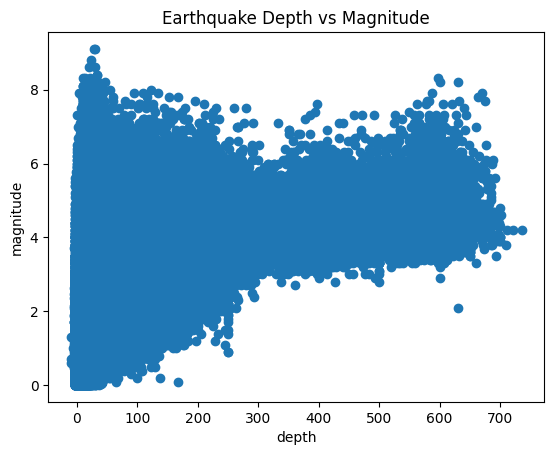

In [31]:
plt.scatter(df['depth'], df['magnitudo'])
plt.xlabel('depth')
plt.ylabel('magnitude')
plt.title('Earthquake Depth vs Magnitude')

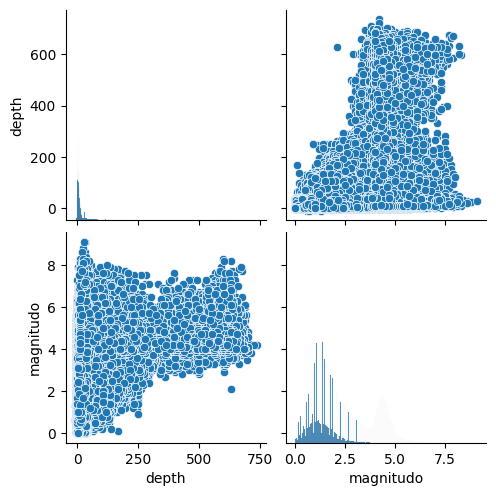

In [32]:
sns.pairplot(df[['depth', 'magnitudo']])


In [33]:
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (3333939, 12)

Column names:
['time', 'place', 'status', 'tsunami', 'significance', 'data_type', 'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date']

First few rows:


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [34]:
print("Data Info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3333939 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 330.7+ MB

Missing values:
time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

Basic statistics:


,time,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.333939e+06,3.333939e+06,3.333939e+06,3.333939e+06,3.333939e+06,3.333939e+06,3.333939e+06
mean,1.244381e+12,4.583167e-04,7.649146e+01,1.844484e+00,-1.010301e+02,3.736931e+01,2.321515e+01
std,2.987701e+11,2.140343e-02,1.024033e+02,1.244765e+00,7.728899e+01,2.056294e+01,5.533029e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,1.000000e-02,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.018250e+12,0.000000e+00,1.500000e+01,1.000000e+00,-1.465836e+02,3.401873e+01,3.156000e+00
50%,1.280033e+12,0.000000e+00,3.500000e+01,1.500000e+00,-1.189680e+02,3.787283e+01,7.800000e+00
75%,1.506823e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.158150e+02,4.808533e+01,1.670000e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [35]:
features = ['depth', 'latitude', 'longitude', 'significance', 'tsunami']
X = df[features]
y = df['magnitudo']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3333939, 5)
Target shape: (3333939,)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2667151, 5)
Testing set size: (666788, 5)


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)

rf_model.fit(X_train, y_train)
print("Training complete!")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.1min


Training complete!


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.8min finished


In [38]:
y_pred = rf_model.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual Magnitude': y_test[:10].values,
    'Predicted Magnitude': y_pred[:10]
})
print(comparison_df)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    8.1s finished


   Actual Magnitude  Predicted Magnitude
0              0.89               0.8866
1              2.79               2.7783
2              2.01               2.0038
3              1.03               1.0149
4              2.17               2.1639
5              0.89               0.8839
6              1.20               1.2000
7              5.20               5.2000
8              4.20               4.2000
9              3.74               3.7391


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print("="*50)

MODEL PERFORMANCE METRICS
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0261
Mean Absolute Error (MAE): 0.0064
R² Score: 0.9996


Model is Overfitting on the data as observed through the R^2 Score

In [79]:
# Checking for data leakage
correlation_with_target = df[features + ['magnitudo']].corr()['magnitudo'].drop('magnitudo')

print("Correlation of features with target (magnitudo):")
for feature, corr in correlation_with_target.items():
    status = "VERY HIGH!" if abs(corr) > 0.9 else "OK" if abs(corr) < 0.7 else "High"
    print(f"{feature:15s}: {corr:6.3f}  {status}")

Correlation of features with target (magnitudo):
depth          :  0.367  OK
latitude       : -0.516  OK
longitude      :  0.623  OK
significance   :  0.957  VERY HIGH!
tsunami        :  0.059  OK


In [67]:
#Retraining model after removing the significance feature.
features_clean = ['depth', 'latitude', 'longitude', 'tsunami']
X_clean = df[features_clean]
y_clean = df['magnitudo']

print("Clean features shape:", X_clean.shape)
print("Features used:", features_clean)

Clean features shape: (3333939, 4)
Features used: ['depth', 'latitude', 'longitude', 'tsunami']


In [68]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print("Training set size:", X_train_clean.shape)
print("Testing set size:", X_test_clean.shape)

Training set size: (2667151, 4)
Testing set size: (666788, 4)


In [69]:
rf_model_clean = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)

rf_model_clean.fit(X_train_clean, y_train_clean)
print("Training complete")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min


Training complete


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.1min finished


In [70]:
y_pred_clean = rf_model_clean.predict(X_test_clean)

mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
rmse_clean = np.sqrt(mse_clean)
mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

print(f"Mean Squared Error (MSE):  {mse_clean:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_clean:.4f}")
print(f"Mean Absolute Error (MAE): {mae_clean:.4f}")
print(f"R² Score: {r2_clean:.4f}")

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.6s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.6s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  1.8min finished


Mean Squared Error (MSE):  0.2642
Root Mean Squared Error (RMSE): 0.5140
Mean Absolute Error (MAE): 0.3816
R² Score: 0.8298


In [71]:
y_train_pred_clean = rf_model_clean.predict(X_train_clean)

train_r2_clean = r2_score(y_train_clean, y_train_pred_clean)
test_r2_clean = r2_score(y_test_clean, y_pred_clean)

print(f"Training R²:  {train_r2_clean:.4f}")
print(f"Test R²:      {test_r2_clean:.4f}")
print(f"Difference:   {abs(train_r2_clean - test_r2_clean):.4f}")
print()
if abs(train_r2_clean - test_r2_clean) > 0.05:
    print("Large gap suggests overfitting")
elif test_r2_clean > 0.98:
    print("Suspiciously high")
else:
    print("Model is well-balanced!")


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.2s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  1.7min finished


Training R²:  0.9761
Test R²:      0.8298
Difference:   0.1463

Large gap suggests overfitting


Model is still overfitting, regularization can be implemented to prevent this overfitting

In [72]:
rf_model_regularized = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,              
    min_samples_split=10,      
    min_samples_leaf=5,        
    max_features='sqrt',       
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model_regularized.fit(X_train_clean, y_train_clean)
print("Training complete.")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   24.4s


Training complete.


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [73]:
y_pred_reg = rf_model_regularized.predict(X_test_clean)
y_train_pred_reg = rf_model_regularized.predict(X_train_clean)

mse_reg = mean_squared_error(y_test_clean, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)
mae_reg = mean_absolute_error(y_test_clean, y_pred_reg)
r2_reg_test = r2_score(y_test_clean, y_pred_reg)

r2_reg_train = r2_score(y_train_clean, y_train_pred_reg)


print(f"Test RMSE:     {rmse_reg:.4f}")
print(f"Test MAE:      {mae_reg:.4f}")
print(f"Test R²:       {r2_reg_test:.4f}")
print()
print(f"Training R²:   {r2_reg_train:.4f}")
print(f"Train-Test Gap: {abs(r2_reg_train - r2_reg_test):.4f}")
print()
if abs(r2_reg_train - r2_reg_test) < 0.05:
    print("Overfitting reduced")
elif abs(r2_reg_train - r2_reg_test) < 0.10:
    print(" Decent Overfitting reduced")
else:
    print("Still some overfitting")


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s


Test RMSE:     0.5245
Test MAE:      0.3929
Test R²:       0.8227

Training R²:   0.8267
Train-Test Gap: 0.0040

Overfitting reduced


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.4s finished


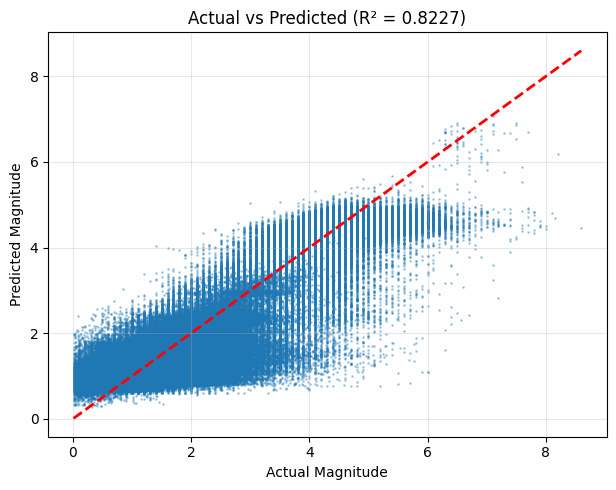

In [74]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_clean, y_pred_reg, alpha=0.3, s=1)
plt.plot([y_test_clean.min(), y_test_clean.max()], 
         [y_test_clean.min(), y_test_clean.max()], 'r--', lw=2)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title(f'Actual vs Predicted (R² = {r2_reg_test:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

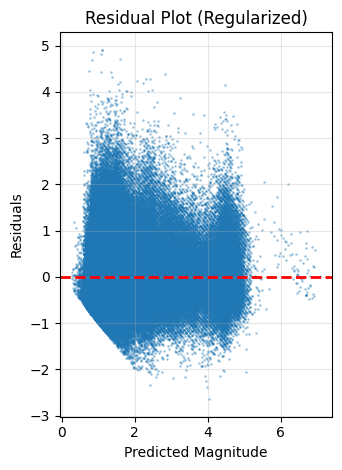

In [75]:
plt.subplot(1, 2, 2)
residuals_reg = y_test_clean - y_pred_reg
plt.scatter(y_pred_reg, residuals_reg, alpha=0.3, s=1)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residuals')
plt.title('Residual Plot (Regularized)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [78]:
# Comparing all models
print(f"{'Model':<30} {'Test R²':>10} {'RMSE':>10} {'Train-Test Gap':>15}")
print("-"*70)
print(f"{'1. With Data Leakage':<30} {r2:>10.4f} {rmse:>10.4f} {abs(train_r2 - test_r2):>15.4f}")
print(f"{'2. Clean (No Leakage)':<30} {r2_clean:>10.4f} {rmse_clean:>10.4f} {abs(train_r2_clean - test_r2_clean):>15.4f}")
print(f"{'3. Clean + Regularized':<30} {r2_reg_test:>10.4f} {rmse_reg:>10.4f} {abs(r2_reg_train - r2_reg_test):>15.4f}")



Model                             Test R²       RMSE  Train-Test Gap
----------------------------------------------------------------------
1. With Data Leakage               0.9996     0.0261          0.0004
2. Clean (No Leakage)              0.8298     0.5140          0.1463
3. Clean + Regularized             0.8227     0.5245          0.0040
